## Problem Metadata 
DO NOT DELETE (JSON Block; the metadata and course context MUST be in the first cell)

```json
{
    "problem_title": "isentropicEfficiencyDeriving",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["easy"],
    "topic": "Properties",
    "lecture_reference": {
        "lecture_id": "",
        "subtopics": [
            {
              "key": "",
              "title": "",
            }
        ]
    },
    "book_reference": {
        "chapter_number": 7,
        "title": "Entropy",
        "sections": [
            "Isentropic Processes",
            "Reversible Steady-Flow Work",
            "Isentropic Efficiencies of Steady-Flow Devices"
        ]
    },
    "notes": ""
}
```

## 1. Problem Statement
Idealized devices operate isentropically while real devices do not. Real devices are characterized by an isentropic efficiency. You are given the inlet pressure and temperature and the outlet pressure. Show the isentropic and actual compression processes on a temperature-specific entropy diagram.

**Goal** 
* Derive the isentropic efficiency for a compressor
* Given an air compressor with an inlet pressure and temperature of 100 kPa and 20$^\circ$C, respectively. a compression ratio of 5, and an isentropic efficiency of 0.9, determine the actual temperature at the exit of the compressor.

## 2. Schematic
Draw a control volume around the compressor. Work is transferred in and should be indicated. No heat is transferred in or out and should be indicated. There is a single inlet and outlet of the fluid stream.

## 3. Assumptions and Approximations
* **Control Volume** (mass crosses the boundary).
* Since this is a general derivation we cannot assume ideal gas.
* Neglect kinetic and potential energy ($\Delta KE \approx 0$, $\Delta PE \approx 0$).
* **Adiabatic process**.
* **Steady-flow process** ($\Delta m_\text{CV}= 0$, $\Delta E_\text{CV}= 0$, $\Delta S_\text{CV}= 0$).
* We have a single inlet and outlet ($\dot{m}_\text{in}$ and $\dot{m}_\text{out}$).

## 4. Physical Laws
1.  **First Law of Thermodynamics (Energy Balance for Control Volume):**
    $$\frac{dE_\text{CV}}{dt} = \dot{E}_\text{in} - \dot{E}_\text{out}$$

2.  **Conservation of Mass (Mass Balance for a Control Volume):**
    $$\frac{dm_\text{CV}}{dt} = \dot{m}_\text{in} - \dot{m}_\text{out}$$

Since this is a steady flow process, we can write:
$$\dot{E}_\text{in} = \dot{E}_\text{out}$$

$$\dot{m}_\text{in} = \dot{m}_\text{out} = \dot{m}$$

We can write our conservation of energy equation as:
$$\dot{W}_\text{in} + \dot{Q}_\text{in} + \dot{m} \left(h_1 + \frac{w_1^2}{2} + g z_1 \right) = \dot{W}_\text{out} + \dot{Q}_\text{out} + \dot{m} \left(h_2 + \frac{w_1^2}{2} + g z_2 \right)$$

Neglecting kinetic and potential energy effects we can write:
$$\dot{W}_\text{in} + \dot{Q}_\text{in} + \dot{m} \left(h_1 \right) = \dot{W}_\text{out} + \dot{Q}_\text{out} + \dot{m} \left(h_2 \right)$$

Applying the adiabatic assumption:
$$\dot{W}_\text{in} + \dot{m} \left(h_1 \right) = \dot{W}_\text{out} + \dot{m} \left(h_2 \right)$$

There is only work transferred in, and not out:
$$\dot{W}_\text{in} = \dot{m} \left(h_2 - h_1 \right)$$

Using our steady flow equation for power input to the compressor, we can define the minimum work into the compressor by analyzing the isentropic case:

$$\left( \dot{W}_\text{in} \right)_\text{s} = \dot{m} \left(h_\text{2s} - h_1 \right)$$

We can also define the actual work into the compressor as:

$$\left( \dot{W}_\text{in} \right)_\text{a} = \dot{m} \left(h_\text{2a} - h_1 \right)$$

Therefore, we can define the isentropic efficiency of a compressor by taking the ratio of these two power input equations (neglecting changes in kinetic and potential energy):

$$\eta_\text{C} = \frac{\left( \dot{W}_\text{in} \right)_\text{s}}{\left( \dot{W}_\text{in} \right)_\text{a}} = \frac{h_\text{2s} - h_1}{h_\text{2a} - h_1} $$

By knowing the inlet pressure, $p_1$, and temperature, $T_1$, of a gas, we can determine the specific enthalpy, $h_1$, and entropy, $s_1$. For the isentropic case, we have $s_2 = s_1$, and we can determine the specific enthalpy at state 2, $h_2$, since we know $p_2$. We term this as $h_\text{2s}$. 

In [17]:
## 5. Properties (Code Cell)
!pip install pyCalor
from pyCalor import thermo as th

substance = 'air'
isentropicEfficiency = 0.9

# state 1
p1_kPa = 100 # kPa
T1_C = 20 # C
st1 = th.state(substance,p=(p1_kPa,'kPa'),T=(T1_C,'C'),name='1')

rp = 5

# state 2s
p2_kPa = rp*p1_kPa
st2s = th.state(substance,p=(p2_kPa,'kPa'),s=(st1.s,'kJ/kg K'),name='2s')

h2a_kJperKg = ((st2s.h - st1.h)/isentropicEfficiency) + st1.h

# state 2a
st2a = th.state(substance,p=(p2_kPa,'kPa'),h=(h2a_kJperKg,'kJ/kg'),name='2a')

481.78324283946654
463.1852293355926


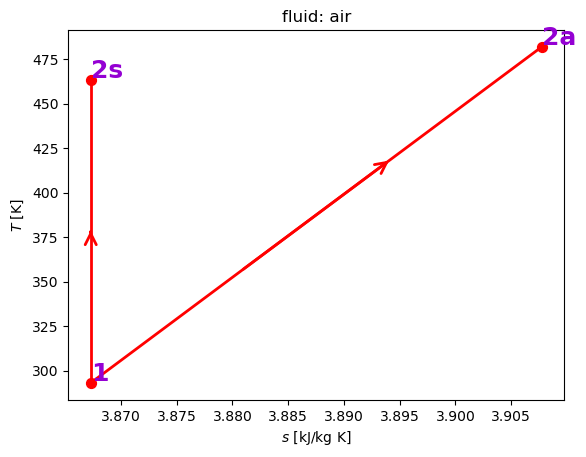

In [16]:
## 6. Calculations (Code Cell)
# Final answer:
T2a_K = st2a.T; print(T2a_K)

# Compare with the isentropic case, T2s_K
T2s_K = st2s.T; print(T2s_K)

# Defining processes for the isentropic and actual compression processes
pr = th.process([(st1,st2a),(st1,st2s)])

# Plotting the isentropic and actual compression processes on a temperature-specific entropy diagram
fig1 = pr.plot("Ts");

# save figure
fig1.savefig("figure_1.pdf")

## 7. 💡 Summary and Reasoning
We know from the definition of isentropic efficiency that the power input to the isentropic compressor is less than the actual compressor. What we would expect then from a **First Law of Thermodynamics** analysis is that the temperature at the exit of the actual compressor should be greater than the isentropic compressor, which we've shown is the case. 